In [11]:
!pip uninstall basicpy -y
!pip install git+https://github.com/yfukai/BaSiCpy/@notebook_reference # will be updated later

Found existing installation: BaSiCPy 0.0.1
Uninstalling BaSiCPy-0.0.1:
  Successfully uninstalled BaSiCPy-0.0.1
  Cloning https://github.com/yfukai/BaSiCpy/ (to revision notebook_reference) to /private/var/folders/pz/_dlzclyn4mjgvngf1dpfg_880000gn/T/pip-req-build-m267xxsr
  Running command git clone -q https://github.com/yfukai/BaSiCpy/ /private/var/folders/pz/_dlzclyn4mjgvngf1dpfg_880000gn/T/pip-req-build-m267xxsr
  Running command git checkout -b notebook_reference --track origin/notebook_reference
  Switched to a new branch 'notebook_reference'
  Branch 'notebook_reference' set up to track remote branch 'notebook_reference' from 'origin'.
  Resolved https://github.com/yfukai/BaSiCpy/ to commit 400170f34c08c51083d3eaa6f45ef35fe0fa89f1
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for BaSiCPy: filename=BaSiCPy-0.0.1-py3-none-any.whl size=18920 sha256=c0d5f7700efa44c47ee0d223af7275887c2775cc

the value of the environment variable BASIC_DCT_BACKEND is not in ["JAX","OPENCV","SCIPY"]

Bad key text.latex.unicode in file /Users/fukai/.matplotlib/stylelib/paper-default2.mplstyle, line 46 ('text.latex.unicode: True')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.1/matplotlibrc.template
or from the matplotlib source distribution
Duplicate key in file PosixPath('/Users/fukai/.matplotlib/stylelib/paper-default.mplstyle'), line 38 ('legend.framealpha: 1.0')
INFO:basicpy.basicpy:reweighting iteration 0
INFO:basicpy.basicpy:single-step optimization score: 7.112951152521418e-07.
INFO:basicpy.basicpy:Iteration 0 finished.
INFO:basicpy.basicpy:reweighting iteration 1
INFO:basicpy.basicpy:single-step optimization score: 9.940741847458412e-07.
INFO:basicpy.basicpy:Iteration 1 finished.
INFO:basicpy.basicpy:reweighting score: 0.08608514070510864
INFO:basicpy.basicpy:elapsed time: 6.479281259 seconds
INFO:basicpy.basicpy:reweight

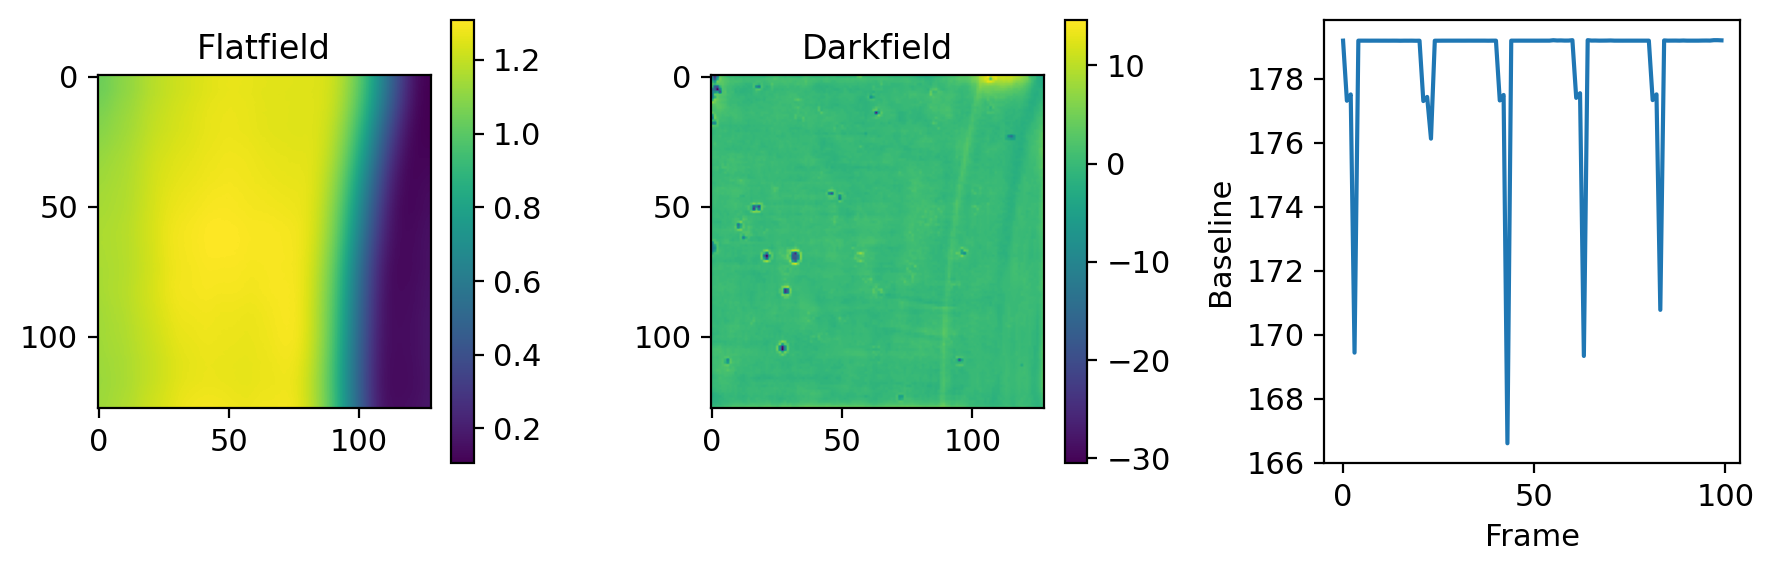

In [1]:
from basicpy import BaSiC
from basicpy import data as bdata
from matplotlib import pyplot as plt

images=bdata.timelapse_brightfield()
basic =BaSiC(get_darkfield=True)
basic.fit(images)

fig,axes = plt.subplots(1,3,figsize=(9,3))
im=axes[0].imshow(basic.flatfield)
fig.colorbar(im,ax=axes[0])
axes[0].set_title('Flatfield')
im=axes[1].imshow(basic.darkfield)
fig.colorbar(im,ax=axes[1])
axes[1].set_title('Darkfield')
axes[2].plot(basic.baseline)
axes[2].set_xlabel('Frame')
axes[2].set_ylabel('Baseline')
fig.tight_layout()

In [2]:
images_transformed=basic.transform(images)

INFO:basicpy.basicpy:=== BaSiC transform started ===
INFO:basicpy.basicpy:unshading in 4 threads
INFO:basicpy.basicpy:=== BaSiC transform finished in 0.026133594000000926 seconds ===


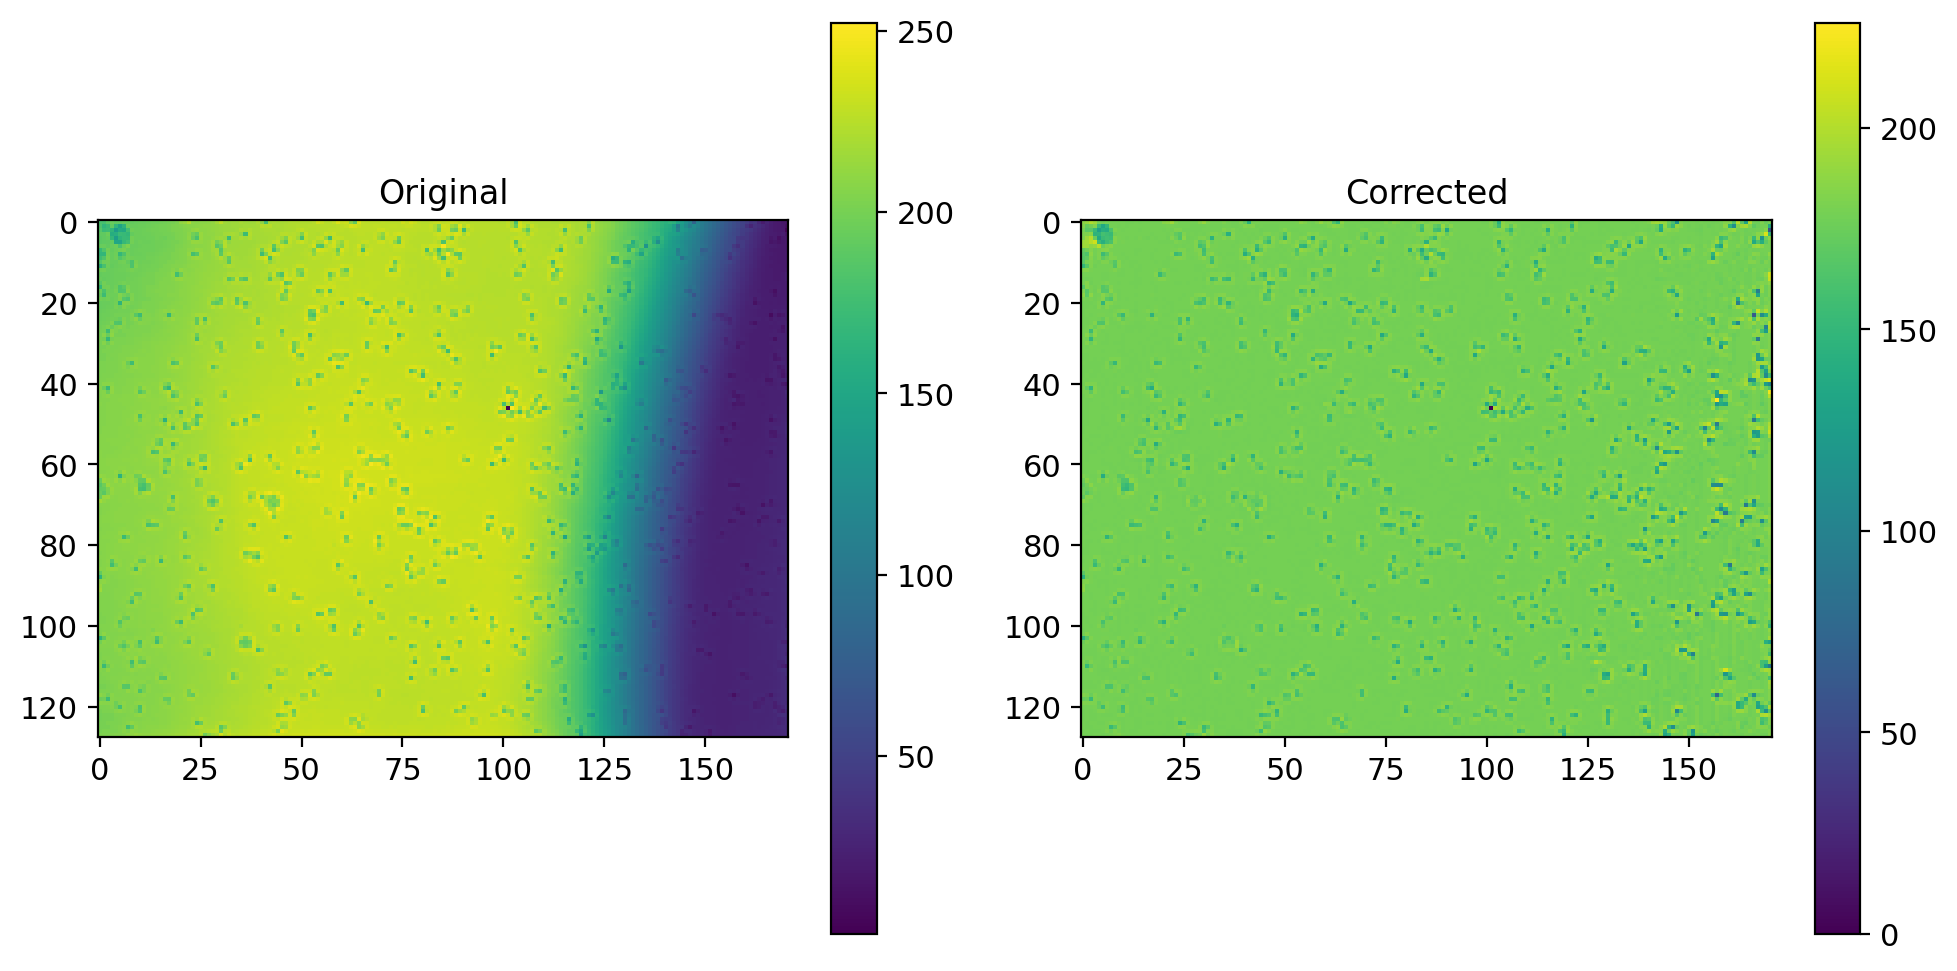

In [5]:
i=12
fig,axes = plt.subplots(1,2,figsize=(10,5))
im=axes[0].imshow(images[i])
fig.colorbar(im,ax=axes[0])
axes[0].set_title('Original')
im=axes[1].imshow(images_transformed[i])
fig.colorbar(im,ax=axes[1])
axes[1].set_title('Corrected')
fig.tight_layout()